<a href="https://colab.research.google.com/github/KushangShah/ML-Project-End-to-End-Machine-Learning./blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**          Kushang Shah

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain.<br> <br>
<p align='left'>
Since 2018, it has been in the news because of the fraud case involving **Rana Kapoor**. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.<br>
I will be analyzing the patterns of the dataset by performing exploratory data analysis and try to build a model with the help of machine learning for **predicting the closing stock price**.<br>
The tools for data analysis and model building used in this project are the packages from Python library such as Numpy and Pandas, Matplotlib , Seaborn, Linear Regression, lasso,ridge, ElasticNet,Minmaxscaler etc.
</p>



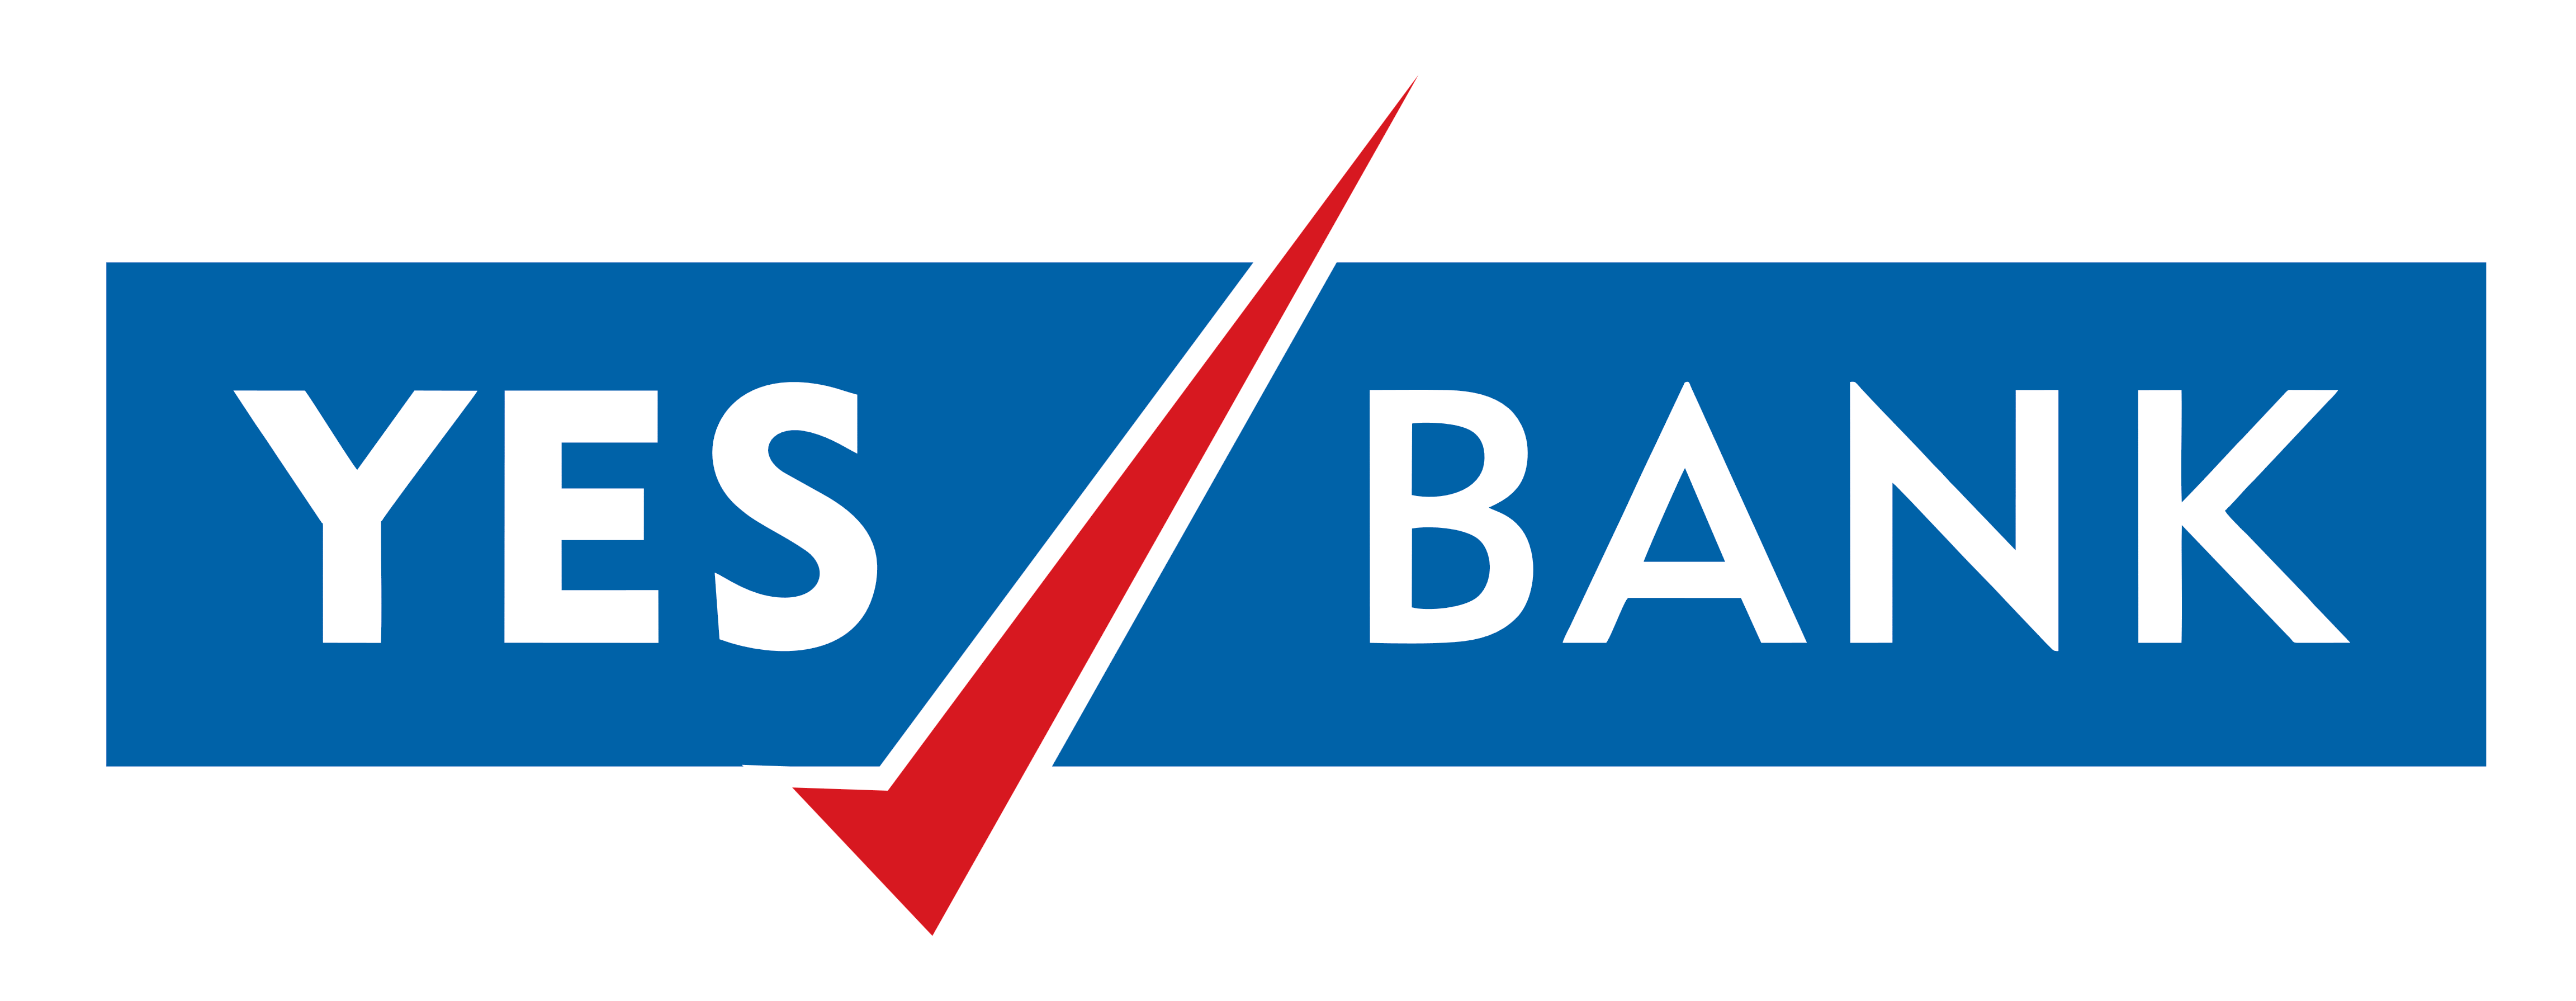

# **GitHub Link -**

## [Project link](https://github.com/KushangShah/ML-Project-End-to-End-Machine-Learning.)

## [Profile link](https://github.com/KushangShah/)

# **Problem Statement**


The given data set contains stock price information in the various columns by monthly date. There are 5 columns in the data set such as date, open, high, low, and closing price. The target variable here is the closing price column, which we will try to predict for the future.

To start, we will perform exploratory data analysis on the data. This involves analyzing the data to find patterns and understand the relationships between the various columns and the target variable column. By doing this, we can gain insights into the data and identify important factors that may influence the closing price.

Once we have a good understanding of the data, we will proceed to build a model. The model will enable us to predict or provide a decent estimate of the closing price, which is our target variable. This prediction will be based on the patterns and relationships identified during the exploratory data analysis.

Overall, the goal is to use the information in the dataset to create a model that can accurately predict the closing price, thereby assisting in making informed decisions related to stock trading and investment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [157]:
# Import Libraries
import numpy as np
import pandas as pd
# from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [51]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# detting csv file
yes_bank_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cohort Paris/ML/CSV/data_YesBank_StockPrices.csv")

### Dataset First View

In [53]:
# Dataset First Look
yes_bank_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
yes_bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [55]:
# Dataset number of rows and columns
yes_bank_df.shape

(185, 5)

### Dataset Information

In [56]:
# Dataset Info
yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [57]:
# Dataset Duplicate Value Count
duplicate = yes_bank_df[yes_bank_df.duplicated()].count()
duplicate

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
yes_bank_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [59]:
# Visualizing the missing values

# No missing found


### What did you know about your dataset?

The dataset consists of 185 rows and 5 columns with various types of variables. There are no missing values or duplicate entries in the dataset. The columns contain two types of information: float and object. The dataset provides an overview of stock price details, and the goal is to analyze the relationship between the target variable (Closing price) and the independent variables in the other 4 columns. Subsequently, machine learning algorithm models will be built to predict or estimate future closing prices based on the insights generated from the data.

## ***2. Understanding Your Variables***

In [60]:
# Dataset Columns
yes_bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [61]:
# Dataset Describe
yes_bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The data set includes the following individual variables and their descriptions:

1. Date: This categorical variable represents the month and day on which the stock price information was recorded.

2. Open: This numeric variable indicates the opening stock price for a given date.

3. High: This numeric variable represents the highest stock price reached on a given date.

4. Low: This numeric variable denotes the lowest stock price recorded on a given date.

5. Close: This numeric variable signifies the closing stock price for a given date.

These variables provide important information about the stock prices and their fluctuations over time, which can be useful for analysis and decision-making in the financial domain.

### Check Unique Values for each variable.

In [62]:
# Check Unique Values for each variable.
for columns in yes_bank_df:
  unique_columns = yes_bank_df[columns].unique()
  print(f"\nUnique value in {columns}:\n{unique_columns}")


Unique value in Date:
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [63]:
# Copying the dataSet so I wouldn't messed up the original dataset
yes_bank_df_2 = yes_bank_df.copy()

In [64]:
# Write your code to make your dataset analysis ready.
yes_bank_df_2['Date'] = pd.to_datetime(yes_bank_df_2['Date'].apply(lambda x: datetime.strptime(x, "%b-%y")))

In [65]:
# Extending Year and Month from date
yes_bank_df_2['Year'] = yes_bank_df_2['Date'].dt.year
yes_bank_df_2['Month'] = yes_bank_df_2['Date'].dt.month

In [66]:
# Checking the new data frame
yes_bank_df_2.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


### What all manipulations have you done and insights you found?

The given data set has been thoroughly checked and confirmed to be free of missing values, null values, and duplicate values. Additionally, the 'Date' column has been reformatted into the standard Year-month-date format to facilitate better visualization and analysis of the data. This ensures that the data is clean and well-prepared for further processing and interpretation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

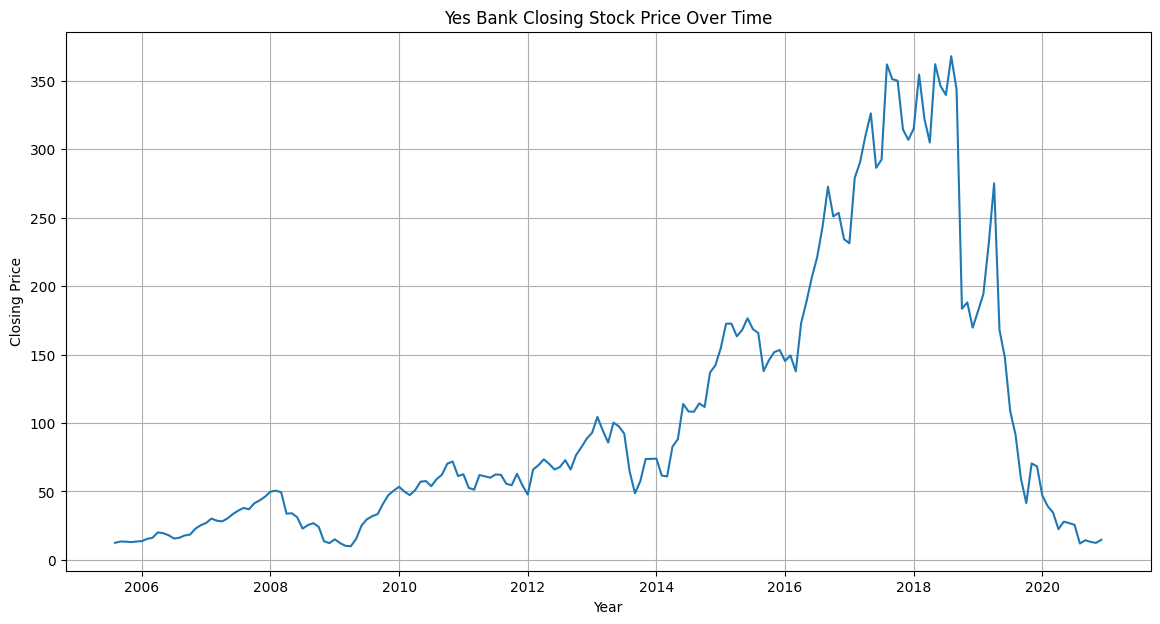

In [67]:
# Chart - 1 visualization code
# Line plot of closing price over time
plt.figure(figsize=(14, 7))
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Close'])

plt.title('Yes Bank Closing Stock Price Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The line plot was chosen to visualize the trend of the closing stock price over time. It helps in understanding how the stock price has changed month-to-month and year-to-year.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals fluctuations and trends in the stock price over time, highlighting periods of significant growth or decline. It can show overall trends such as steady growth, periods of volatility, or major drops, which can be correlated with significant events in the bank's history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in several ways:

 - Positive Impact: Identifying periods of growth can help in understanding the factors that contributed to the positive performance, allowing replication of such strategies in the future.<br>

 - Negative Growth: The chart can also reveal periods of sharp declines. Understanding these declines can help in mitigating similar risks in the future. For example, a significant drop might correlate with the fraud case involving *Rana Kapoor*, highlighting the importance of corporate governance and transparency.

#### Chart - 2

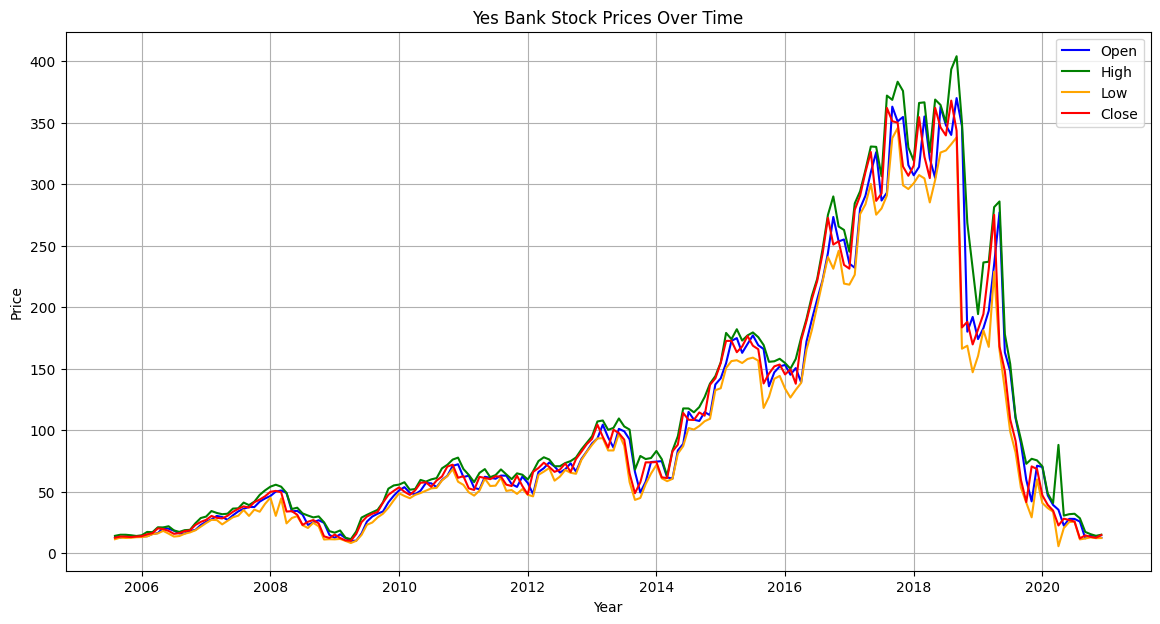

In [68]:
# Chart - 2 visualization code
# Line Plot of Open, High, Low, and Close Prices Over Time
plt.figure(figsize=(14, 7))

plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Open'], label='Open', color='blue')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['High'], label='High', color='green')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Low'], label='Low', color='orange')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Close'], label='Close', color='red')

plt.title('Yes Bank Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The line plot for Open, High, Low, and Close prices over time was chosen to provide a comprehensive view of the stock price movements. This chart allows us to see how these four key metrics interact and vary over time.

##### 2. What is/are the insight(s) found from the chart?

*   The chart shows the overall trend and range of stock prices, indicating periods of high volatility and stability.
*   It highlights how the closing price compares to the opening price within each month, and how the high and low prices fluctuate.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable for several reasons:

- Positive Impact: By understanding the volatility and price movements, investors can make more informed decisions regarding entry and exit points for trading the stock.

- Negative Growth: Periods where the stock price shows significant volatility may indicate underlying issues or market reactions to negative news. Recognizing these patterns can help the bank to address the causes and manage investor relations better.

#### Chart - 3

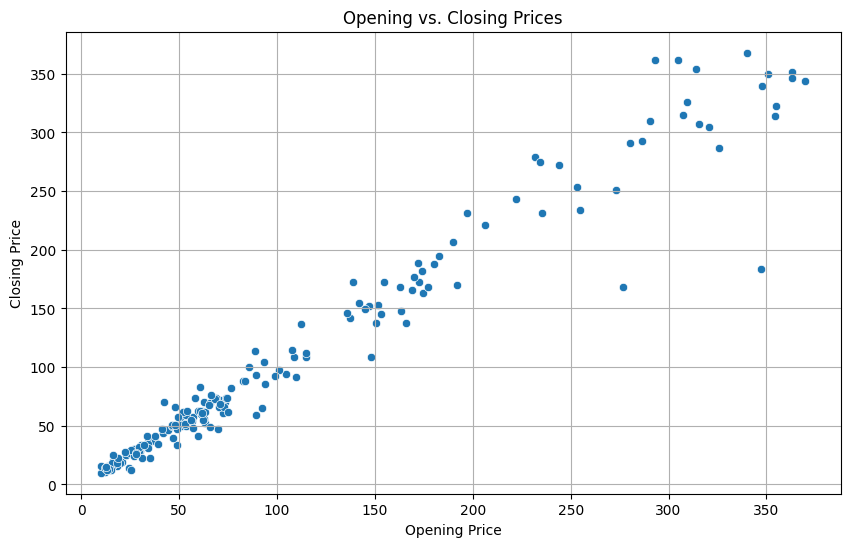

In [69]:
# Chart - 3 visualization code
# Scater plot of opening VS closing price
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.scatterplot(x='Open', y='Close', data=yes_bank_df_2,)

plt.title('Opening vs. Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between the opening and closing prices. It helps in identifying how the stock's opening price correlates with its closing price on a monthly basis.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between opening and closing prices. A strong positive correlation would indicate that the stock often closes near its opening price, while a weaker correlation could indicate more significant daily fluctuations.

*   It can also highlight any outliers where the closing price is significantly different from the opening price, suggesting high volatility or market reactions during the trading period.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the correlation between opening and closing prices can help traders and investors predict closing prices based on the opening price, aiding in more informed trading decisions.

- Negative Growth: If there are significant discrepancies between opening and closing prices frequently, it may indicate market instability or external factors influencing the stock's volatility. Identifying these patterns can help the bank in mitigating factors causing such fluctuations.

#### Chart - 4

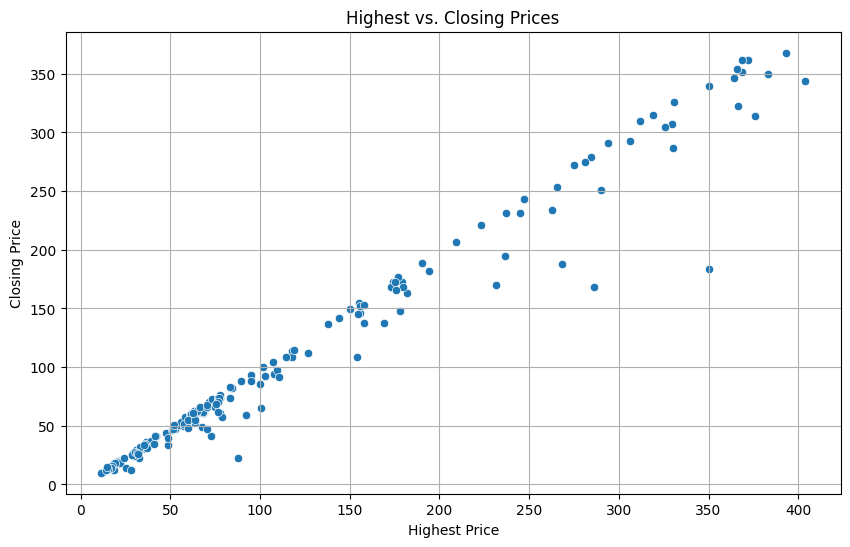

In [70]:
# Chart - 4 visualization code
# Scatter Plot of Highest vs. Closing Prices
plt.figure(figsize=(10, 6))

sns.scatterplot(x='High', y='Close', data=yes_bank_df_2)

plt.title('Highest vs. Closing Prices')
plt.xlabel('Highest Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was selected to visualize the relationship between the highest and closing prices. It allows us to examine how the highest price of the day correlates with the closing price, indicating intraday price movements.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between the highest and closing prices. A strong positive correlation suggests that the closing price tends to be closer to the highest price of the day, indicating bullish market sentiment.

*   Conversely, a weaker correlation may indicate instances where the closing price is significantly lower than the highest price, signaling potential profit-taking or bearish market sentiment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the relationship between the highest and closing prices can help traders and investors gauge market sentiment and identify potential buying or selling opportunities.

- Negative Growth: Significant deviations between the highest and closing prices may indicate market volatility or manipulation, which could lead to increased investor uncertainty and potential negative impacts on the stock's performance.

#### Chart - 5

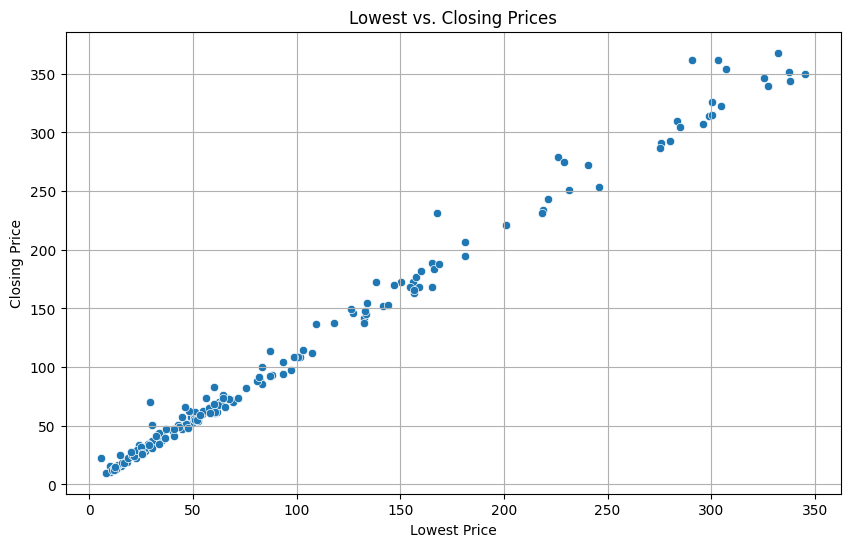

In [71]:

# Chart - 5 visualization code
# Scatter Plot of Lowest vs. Closing Prices
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Low', y='Close', data=yes_bank_df_2)

plt.title('Lowest vs. Closing Prices')
plt.xlabel('Lowest Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between the lowest and closing prices. It helps in understanding how the lowest price of the day correlates with the closing price, providing insights into intraday price movements.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between the lowest and closing prices. A strong positive correlation suggests that the closing price tends to be closer to the lowest price of the day, indicating bearish market sentiment.

*   Conversely, a weaker correlation may indicate instances where the closing price is significantly higher than the lowest price, suggesting potential buying interest or bullish market sentiment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the relationship between the lowest and closing prices can help traders and investors assess market sentiment and identify potential entry or exit points.

- Negative Growth: Significant discrepancies between the lowest and closing prices may indicate market volatility or manipulation, which could lead to increased investor uncertainty and potential negative impacts on the stock's performance.

#### Chart - 6

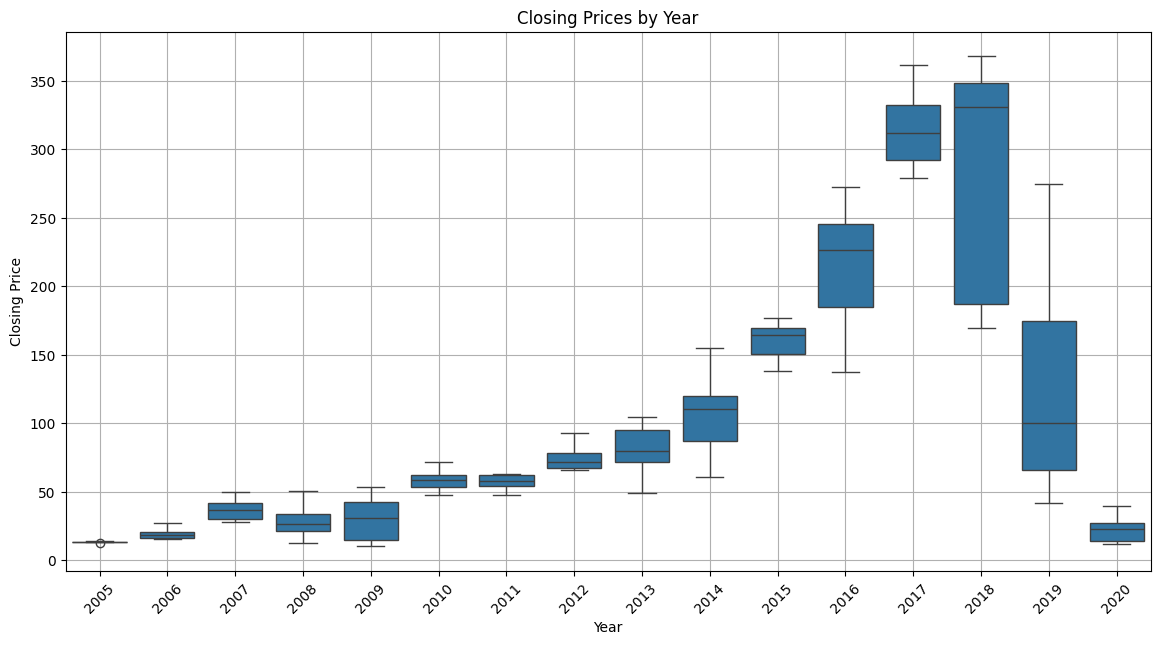

In [72]:
# Chart - 6 visualization code
# Box Plot of Closing Prices by Year
plt.figure(figsize=(14, 7))

sns.boxplot(x='Year', y='Close', data=yes_bank_df_2)

plt.title('Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen to visualize the distribution of closing prices for each year. It provides a summary of the data's central tendency and variability, highlighting the median, quartiles, and potential outliers in the closing prices annually.

##### 2. What is/are the insight(s) found from the chart?



*   The box plot shows the range and distribution of closing prices for each year, highlighting trends, consistency, and variability over time.
*   It can identify years with high volatility (large interquartile ranges) or stability (smaller interquartile ranges).

*   Outliers can be easily spotted, indicating unusual spikes or drops in closing prices during specific years.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the annual distribution of closing prices helps in assessing the bank's stock performance over different years. This can aid in strategic planning and investment decisions by identifying stable and volatile periods.

- Negative Growth: Identifying years with high volatility or significant outliers can help in analyzing the underlying causes, such as economic events or internal issues, allowing for better risk management and corrective measures.

#### Chart - 7

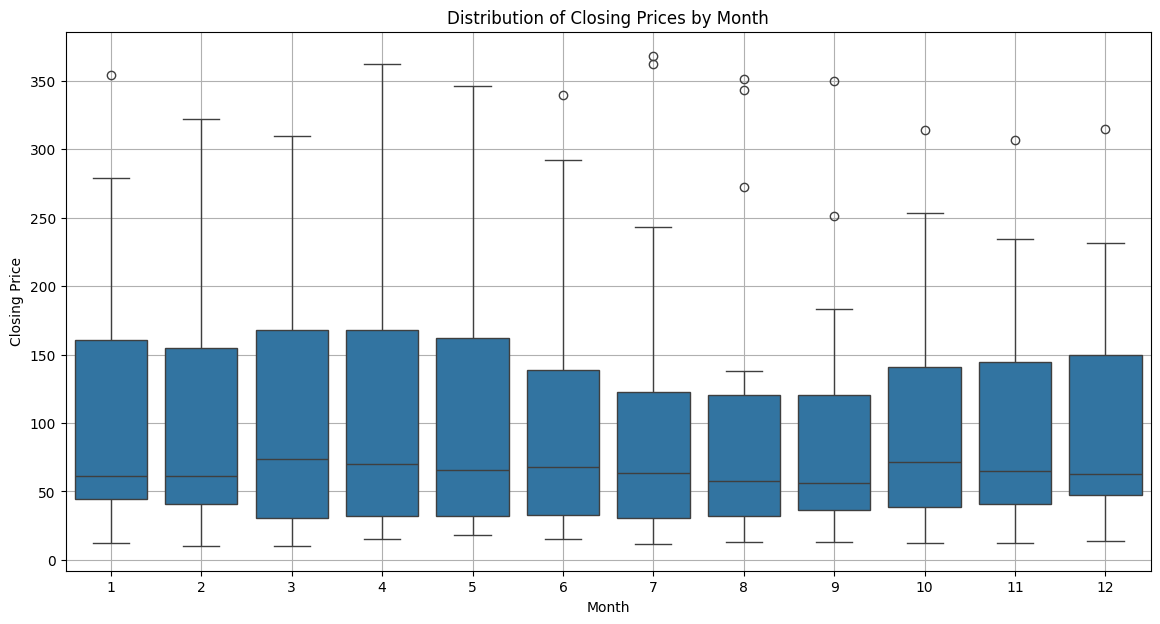

In [73]:
# Chart - 7 visualization code
# Box Plot of Closing Prices by Month
plt.figure(figsize=(14, 7))

sns.boxplot(x='Month', y='Close', data=yes_bank_df_2)

plt.title('Distribution of Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price')
# plt.xticks(rotation=45)
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen to visualize the distribution of closing prices for each month across all years. It provides insights into the monthly variations and seasonal patterns in the closing prices, helping to identify any consistent trends or anomalies within specific months.

##### 2. What is/are the insight(s) found from the chart?

- The box plot shows the range and distribution of closing prices for each month, highlighting trends, consistency, and variability within each month over the years.

- It can identify months with high volatility (large interquartile ranges) or stability (smaller interquartile ranges).

- Outliers can be easily spotted, indicating unusual spikes or drops in closing prices during specific months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the monthly distribution of closing prices helps in assessing seasonal patterns and trends. This can aid in strategic planning and investment decisions by identifying months that tend to be more favorable or risky for the stock.

- Negative Growth: Identifying months with high volatility or significant outliers can help in analyzing the underlying causes, such as seasonal business cycles, economic events, or external factors, allowing for better risk management and corrective measures.

#### Chart - 8

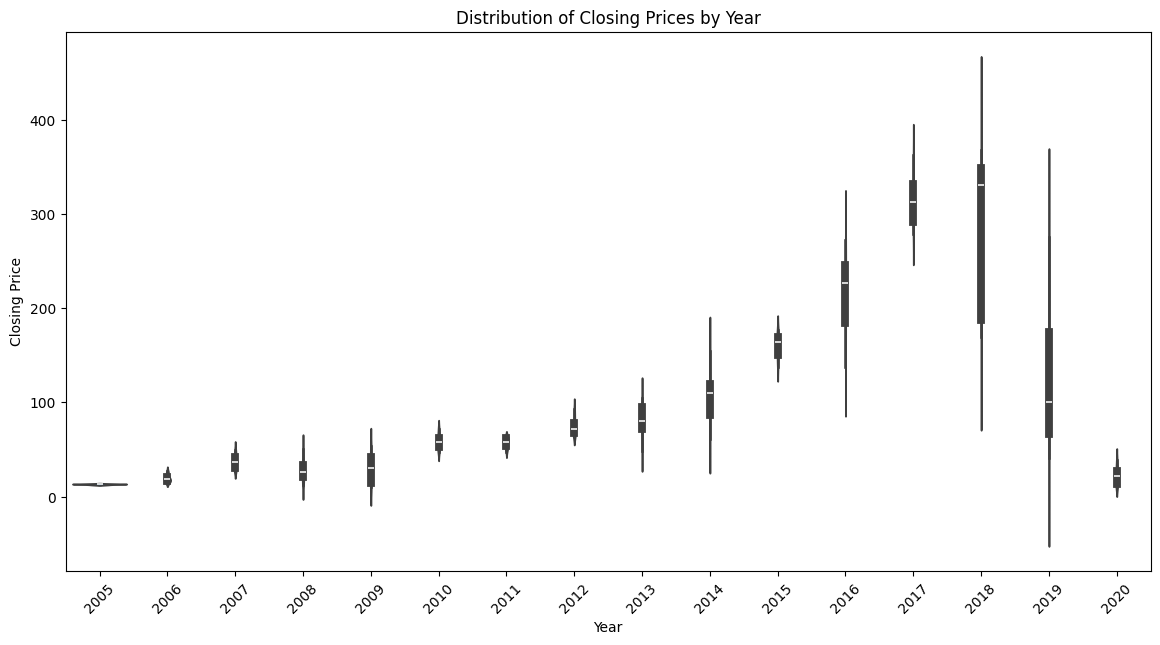

In [74]:
# Chart - 8 visualization code
# Violin Plot of Closing Prices by Year
plt.figure(figsize=(14, 7))

sns.violinplot(x='Year', y='Close', data=yes_bank_df_2)

plt.title('Distribution of Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
# plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was chosen to visualize the distribution of closing prices for each year. It combines aspects of a box plot and a density plot, showing the probability density of the data at different values. This helps in understanding both the central tendency and the spread of the data within each year.

##### 2. What is/are the insight(s) found from the chart?

- The violin plot shows the distribution shape, including the median, quartiles, and variability of closing prices for each year.

- It highlights how the distribution of closing prices changes over time, indicating years with high or low volatility.

- The width of the violin plot at different price levels indicates the frequency of closing prices in those ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the yearly distribution of closing prices helps in assessing long-term trends and market behavior. This can aid in strategic planning, risk management, and investment decisions by identifying years with favorable or unfavorable market conditions.

- Negative Growth: Identifying years with unusual distributions or high volatility can prompt further investigation into underlying causes, such as economic events or internal factors, allowing for better management and corrective actions.

#### Chart - 9

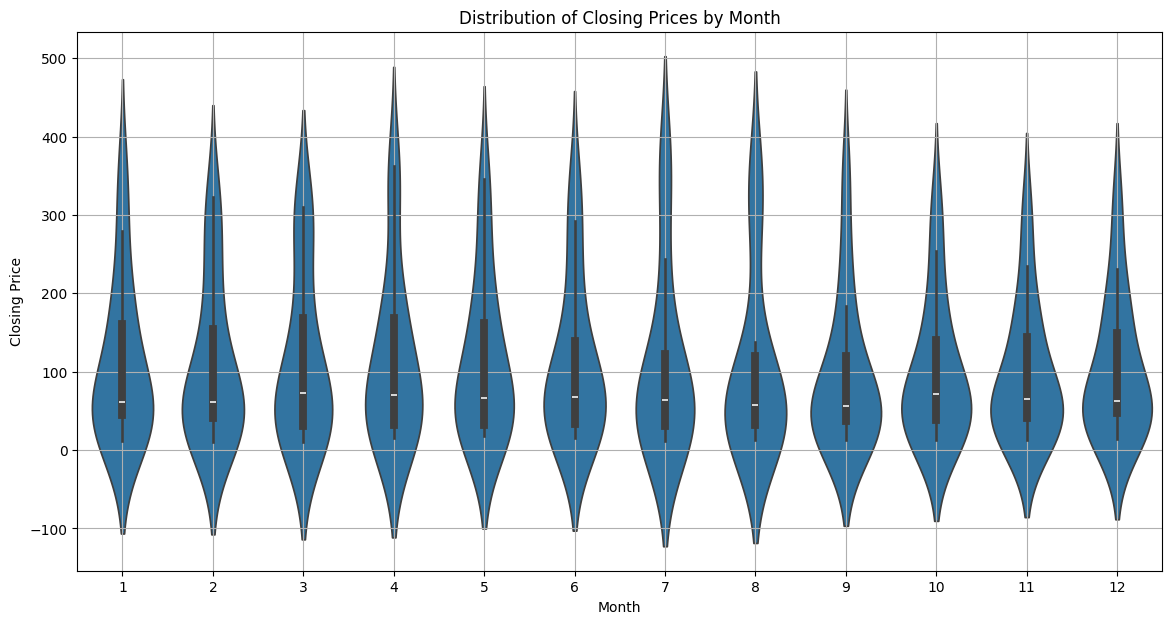

In [75]:
# Chart - 9 visualization code
# Violin Plot of Closing Prices by Month

plt.figure(figsize=(14, 7))

sns.violinplot(x='Month', y='Close', data=yes_bank_df_2)

plt.title('Distribution of Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was chosen to visualize the distribution of closing prices for each month across all years. It combines aspects of a box plot and a density plot, showing the probability density of the data at different values. This helps in understanding both the central tendency and the spread of the data within each month.

##### 2. What is/are the insight(s) found from the chart?

- The violin plot shows the distribution shape, including the median, quartiles, and variability of closing prices for each month.
- It highlights how the distribution of closing prices changes month-to-month, indicating months with high or low volatility.
- The width of the violin plot at different price levels indicates the frequency of closing prices in those ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the monthly distribution of closing prices helps in assessing seasonal trends and market behavior. This can aid in strategic planning, risk management, and investment decisions by identifying months with favorable or unfavorable market conditions.

- Negative Growth: Identifying months with unusual distributions or high volatility can prompt further investigation into underlying causes, such as seasonal economic factors or external events, allowing for better management and corrective actions.

#### Chart - 10

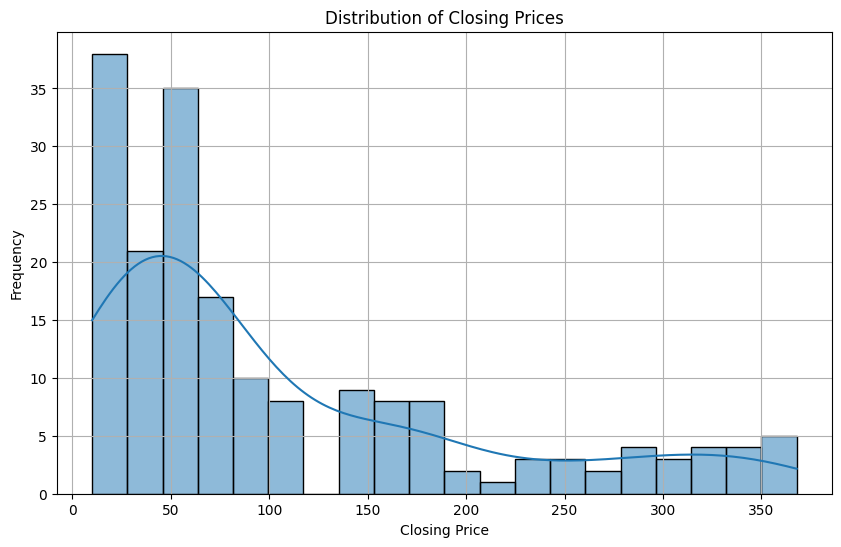

In [76]:
# Chart - 10 visualization code
# Histogram of closing price

plt.figure(figsize=(10, 6))

sns.histplot(yes_bank_df_2['Close'], bins=20, kde=True)

plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the frequency distribution of closing prices over the entire dataset. It helps in understanding how often each price range occurs, providing insights into the overall distribution and common price levels.

##### 2. What is/are the insight(s) found from the chart?

- The histogram shows the frequency of different closing price ranges, revealing whether the prices are normally distributed, skewed, or have multiple peaks.
- It helps identify the most common closing price ranges, indicating where the stock price tends to stabilize.
- It can highlight outliers or extreme values that occur less frequently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the distribution of closing prices helps investors and analysts assess the stock's price stability and volatility. It can inform risk assessment and investment strategies, indicating whether the stock typically stays within a certain price range.

- Negative Growth: Identifying extreme values or unusual distributions can prompt further investigation into the causes, such as market events or internal issues, allowing for better risk management and corrective actions.

#### Chart - 11

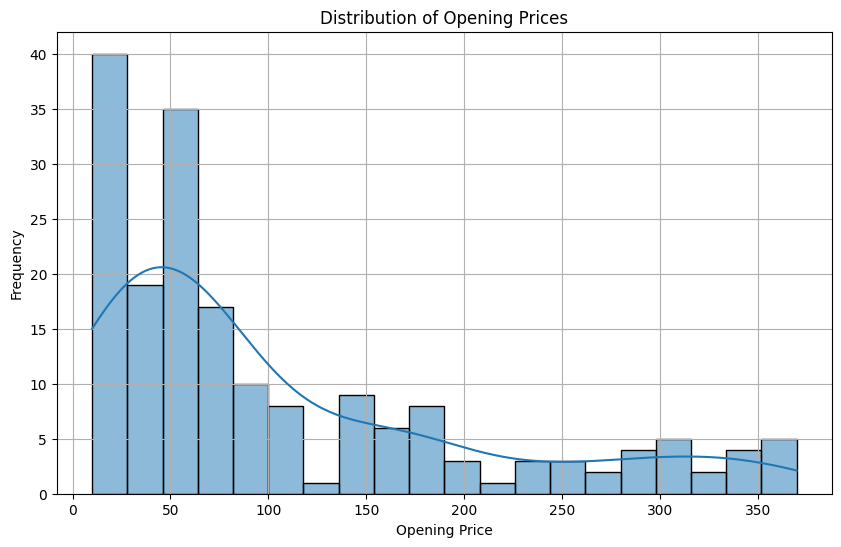

In [77]:
# Chart - 11 visualization code
# Histogram of opening price

plt.figure(figsize=(10, 6))

sns.histplot(yes_bank_df_2['Open'], bins=20, kde=True)

plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the frequency distribution of opening prices over the entire dataset. It helps in understanding how often each price range occurs, providing insights into the overall distribution and common price levels at market open.


##### 2. What is/are the insight(s) found from the chart?

- The histogram shows the frequency of different opening price ranges, revealing whether the prices are normally distributed, skewed, or have multiple peaks.
- It helps identify the most common opening price ranges, indicating where the stock price tends to open.
- It can highlight outliers or extreme values that occur less frequently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the distribution of opening prices helps investors and analysts assess the stock's price stability and volatility at the start of the trading period. It can inform risk assessment and investment strategies, indicating whether the stock typically opens within a certain price range.

- Negative Growth: Identifying extreme values or unusual distributions can prompt further investigation into the causes, such as pre-market news or events, allowing for better risk management and corrective actions.

#### Chart - 12

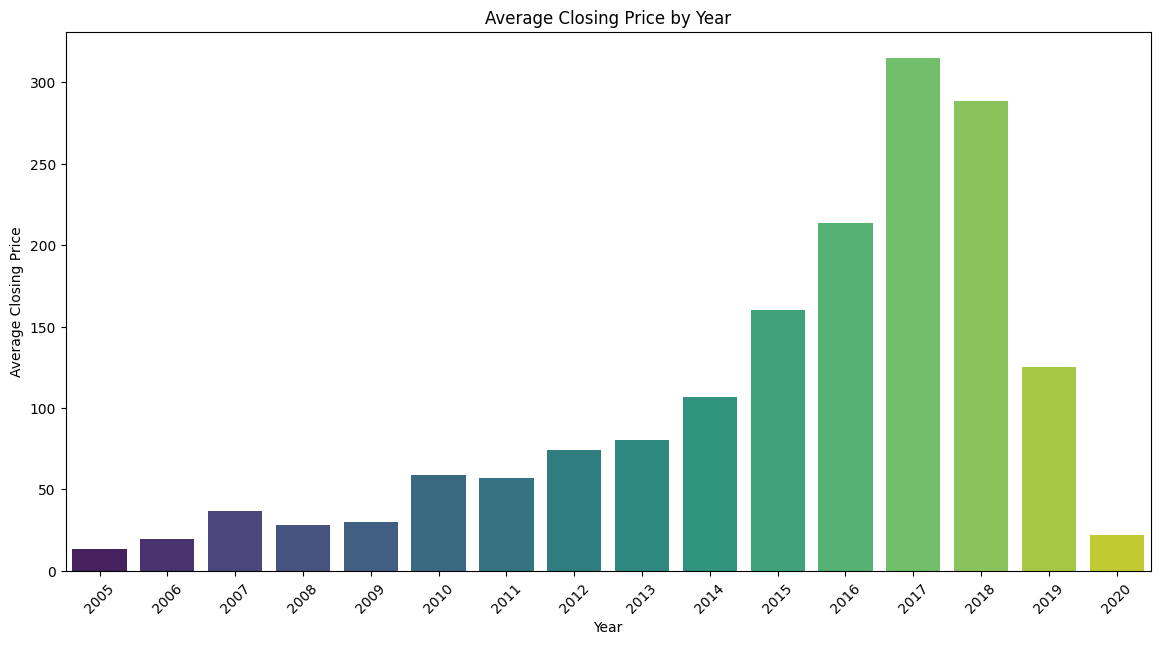

In [78]:
# Extract year from the Date column
yes_bank_df_2['Year'] = yes_bank_df_2['Date'].dt.year

# Calculate average closing price by year
average_closing_price_by_year = yes_bank_df_2.groupby('Year')['Close'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(14, 7))

sns.barplot(x='Year', y='Close', data=average_closing_price_by_year, palette='viridis')

plt.title('Average Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)

plt.show()

##### 1. Why did you pick the specific chart?

The bar plot was chosen to visualize the average closing price for each year. It provides a clear and concise way to compare the average annual closing prices, highlighting trends and variations over time.

##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows the average closing price for each year, allowing for easy comparison of stock performance over different years.
- It highlights trends, such as periods of growth or decline in the average closing prices, indicating overall market sentiment and performance.
- Sudden changes in the average closing prices can point to significant market events or changes in company performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the average closing prices over the years helps investors and analysts identify long-term trends and assess the stock's historical performance. This information can be crucial for strategic planning, investment decisions, and forecasting future performance.

- Negative Growth: Identifying years with significant drops in the average closing price can help in analyzing the underlying causes, such as economic downturns or internal issues, allowing for better risk management and corrective measures.

#### Chart - 13

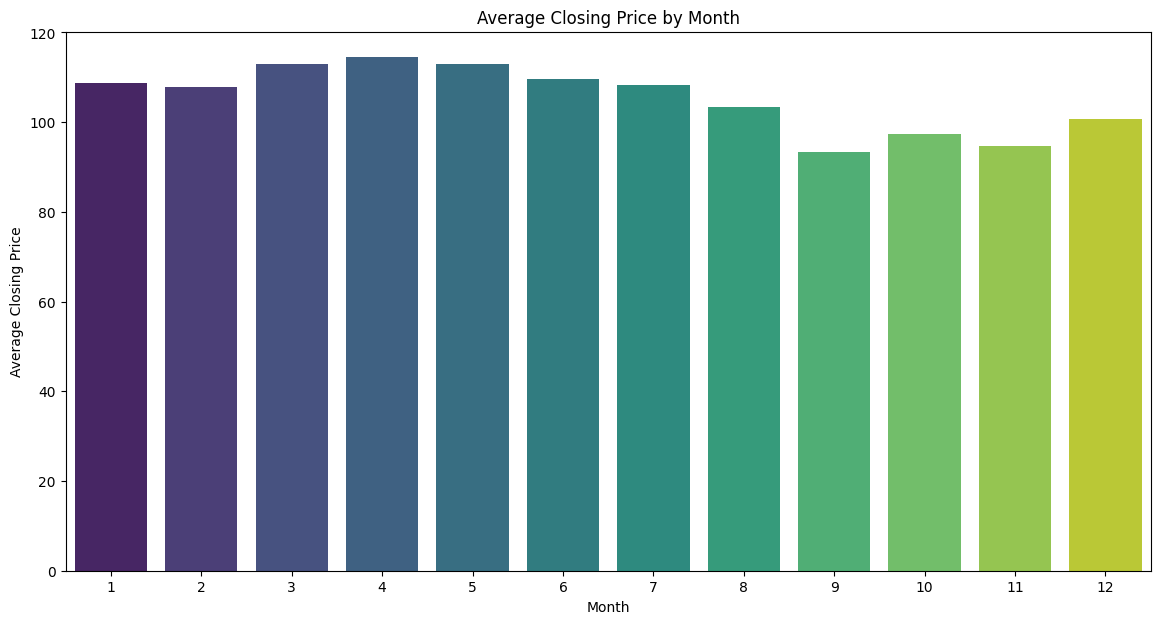

In [79]:
# Chart - 13 visualization code
# bar plot of average closing price by month
# Extract month from the Date column
yes_bank_df_2['Month'] = yes_bank_df_2['Date'].dt.month

# Calculate average closing price by month
average_closing_price_by_month = yes_bank_df_2.groupby('Month')['Close'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(14, 7))

sns.barplot(x='Month', y='Close', data=average_closing_price_by_month, palette='viridis')
plt.title('Average Closing Price by Month')

plt.xlabel('Month')
plt.ylabel('Average Closing Price')

plt.show()

##### 1. Why did you pick the specific chart?

The bar plot was chosen to visualize the average closing price for each month across all years. It provides a clear and concise way to compare the average monthly closing prices, highlighting seasonal trends and variations.

##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows the average closing price for each month, allowing for easy comparison of stock performance on a monthly basis.
- It highlights seasonal trends, such as periods of higher or lower average closing prices, indicating recurring patterns in the stock's performance.
- Sudden changes in the average closing prices in certain months can point to significant market events or seasonal factors affecting the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the average closing prices on a monthly basis helps investors and analysts identify seasonal trends and assess the stock's performance throughout the year. This information can be crucial for strategic planning, investment decisions, and identifying optimal times for buying or selling.

- Negative Growth: Identifying months with significant drops in the average closing price can help in analyzing the underlying causes, such as seasonal downturns or external events, allowing for better risk management and corrective measures.

#### Chart - 14 - Correlation Heatmap

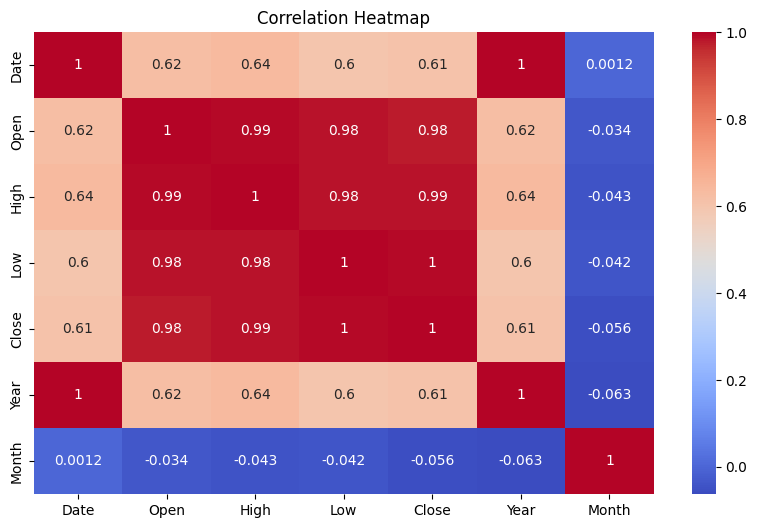

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(yes_bank_df_2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

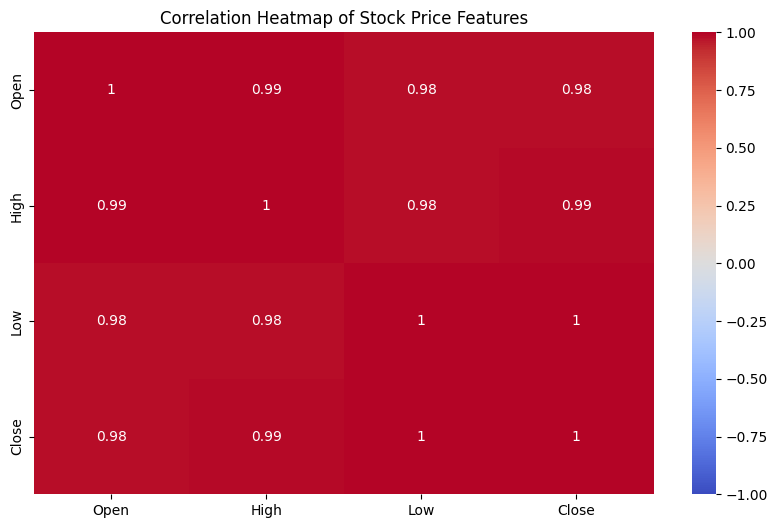

In [81]:
# Correlation Heatmap visualization code
# Calculate the correlation matrix
correlation_matrix = yes_bank_df_2[['Open', 'High', 'Low', 'Close']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stock Price Features')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it effectively visualizes the linear relationships between multiple numerical features in the dataset. For a regression problem like stock price prediction, understanding the correlation between variables (such as Open, High, Low, and Close prices) is crucial. It helps identify multicollinearity and informs feature selection for building predictive models.

##### 2. What is/are the insight(s) found from the chart?

- The heatmap reveals strong positive correlations between the Open, High, Low, and Close prices. This indicates that these variables tend to move together.

- High correlation values (close to 1) between the Close price and other price features suggest that they all have significant linear relationships.

- Such strong correlations suggest redundancy among these features, which can affect the performance and interpretability of regression models. Identifying these relationships helps in deciding which features to include or exclude in the model to prevent multicollinearity.

#### Chart - 15 - Pair Plot

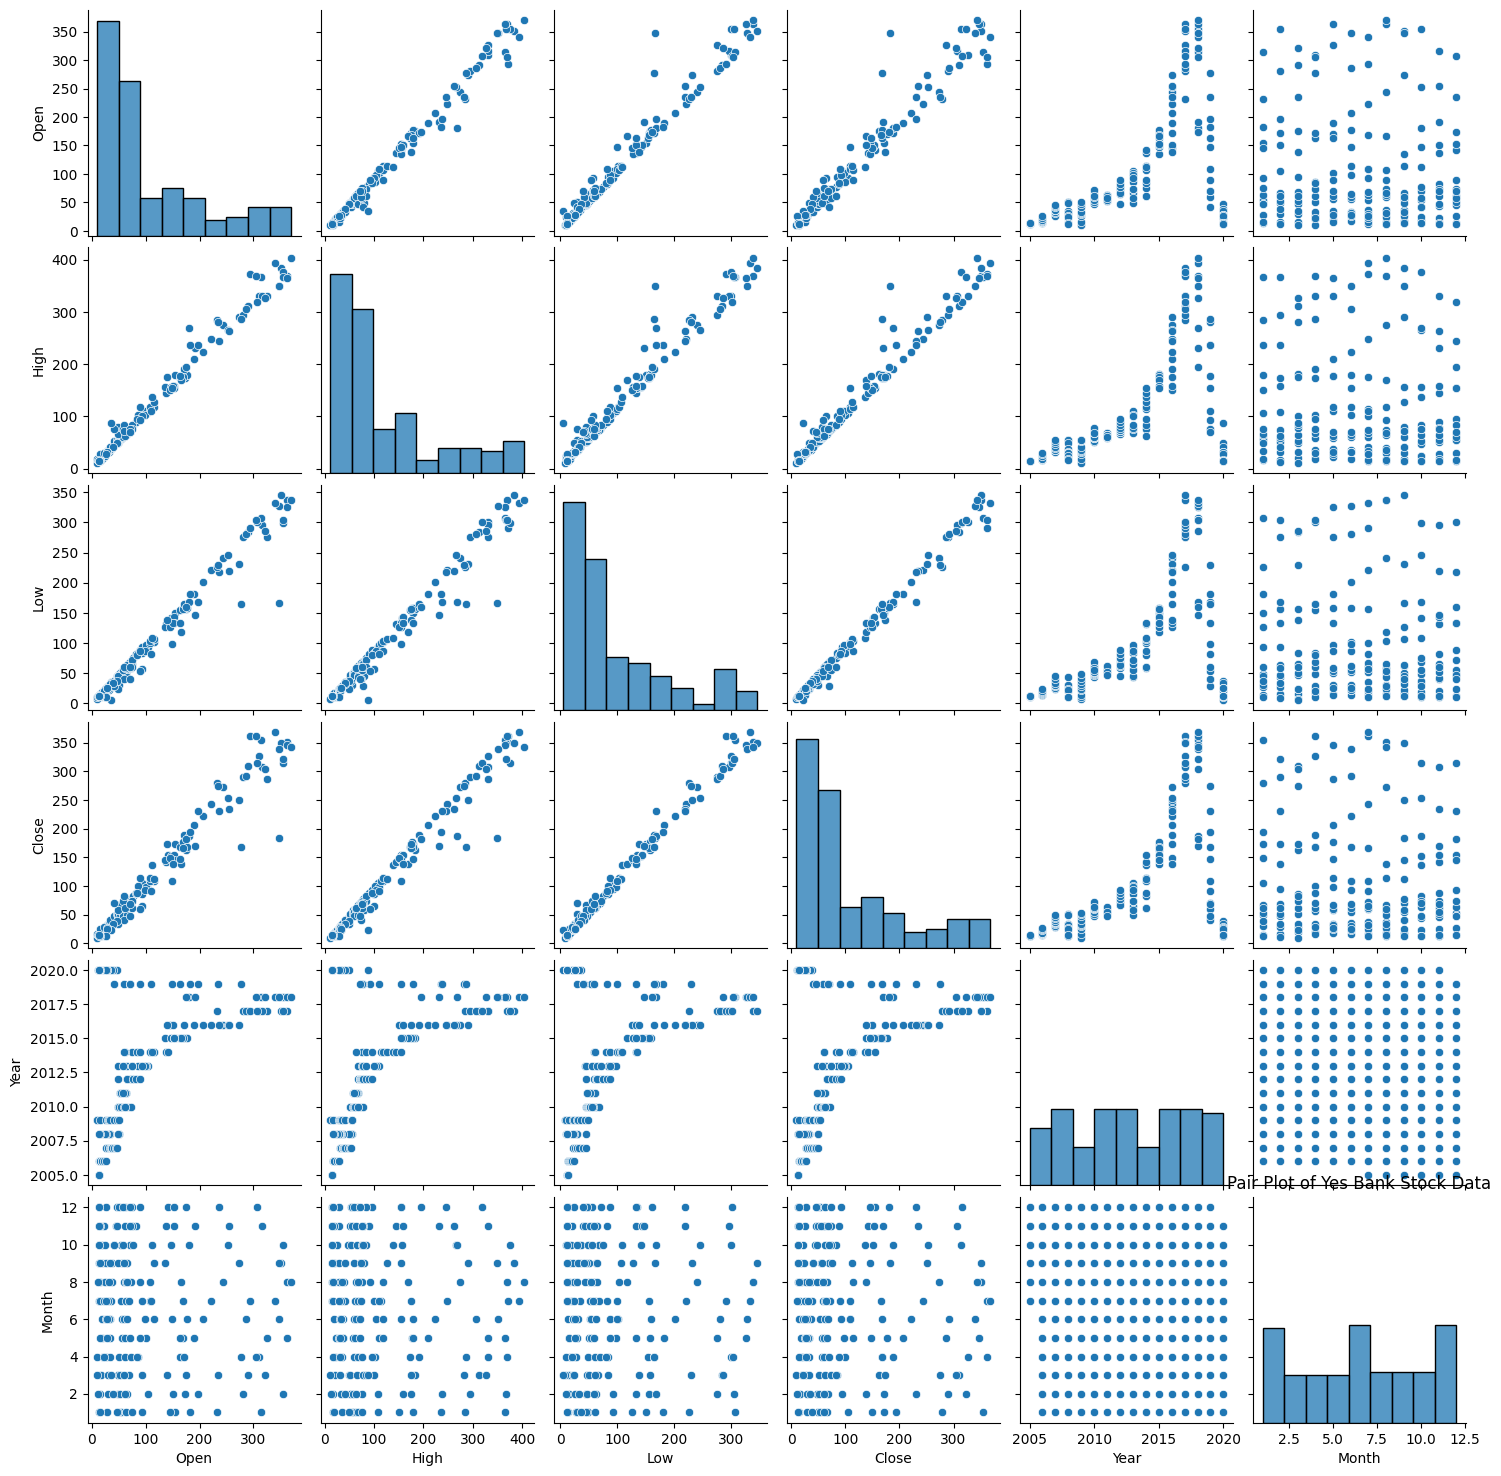

In [82]:
# Pair Plot visualization code
sns.pairplot(yes_bank_df_2)
plt.title('Pair Plot of Yes Bank Stock Data')
plt.show()

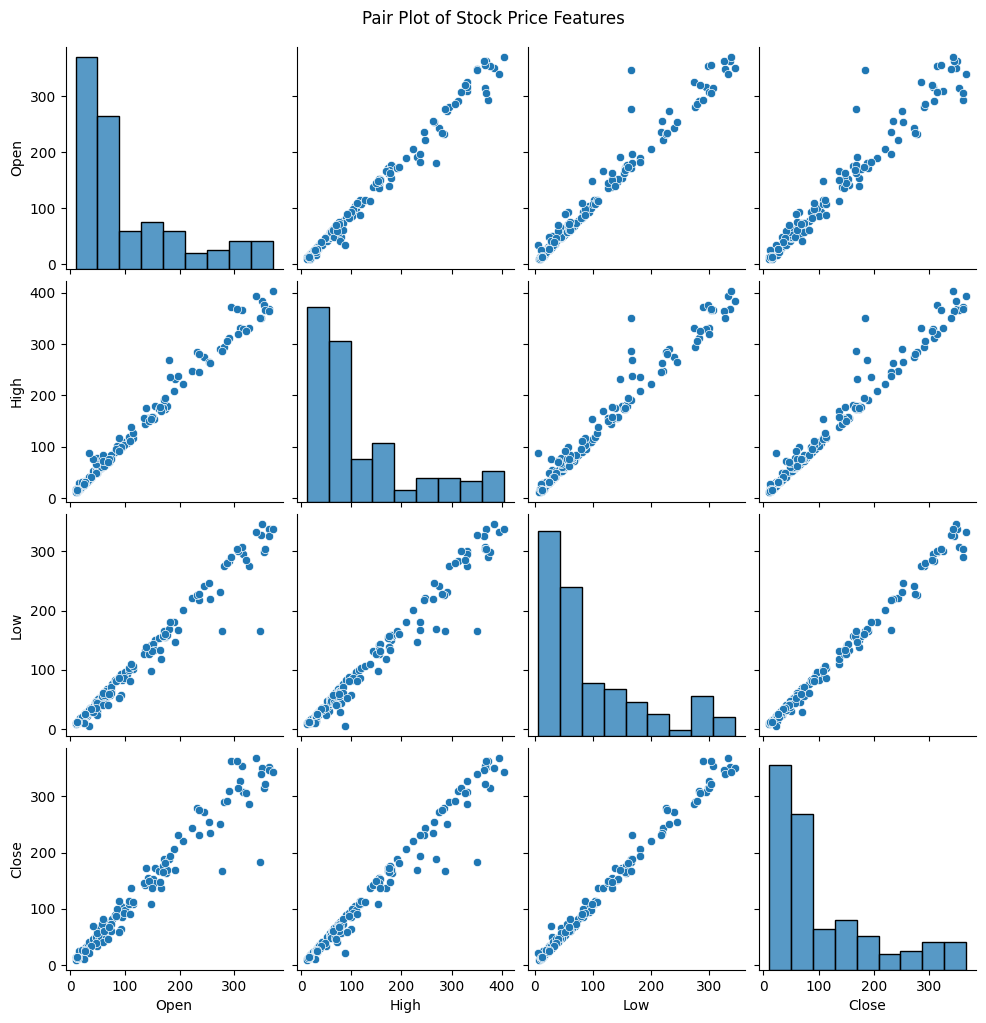

In [83]:
sns.pairplot(yes_bank_df_2[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pair Plot of Stock Price Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen because it provides a comprehensive and detailed view of the relationships between multiple numerical features in the dataset. It shows scatter plots for each pair of variables, which helps in identifying linear and non-linear relationships, as well as histograms for individual variables, which illustrate their distributions. This makes the pair plot an excellent tool for initial exploratory data analysis to understand the interactions and correlations between features.

##### 2. What is/are the insight(s) found from the chart?

- The scatter plots between pairs of features (Open, High, Low, Close) reveal strong linear relationships, indicating that these variables tend to move together.

- The diagonal plots show the distribution of each variable, indicating that stock prices are skewed and have a wide range of values.
- The strong correlations between the features, as seen in the scatter plots, suggest that they can be used to predict each other to some extent, which is valuable information for building regression models.
- Outliers and clusters can also be identified in the scatter plots, which may indicate unusual market events or periods of high volatility.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H0)**: There is no significant difference in the average closing prices between the years before and after the fraud case involving Rana Kapoor (i.e., the mean closing prices before 2018 and after 2018 are equal).

- **Alternate Hypothesis (H1)**: There is a significant difference in the average closing prices between the years before and after the fraud case involving Rana Kapoor (i.e., the mean closing prices before 2018 and after 2018 are not equal).

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
# importing linrary
import scipy.stats as stats

# Separating the data into two groups: before and after 2018
before_2018 = yes_bank_df_2[yes_bank_df_2['Date'] < '2018-01-01']['Close']
after_2018 = yes_bank_df_2[yes_bank_df_2['Date'] >= '2018-01-01']['Close']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(before_2018, after_2018)

t_stat, p_value

(-2.970367837565708, 0.003373523264015453)

##### Which statistical test have you done to obtain P-Value?

I have used Correlation stat test

##### Why did you choose the specific statistical test?

The two-sample t-test is appropriate here because it compares the means of two independent groups (closing prices before and after 2018) to determine if there is a statistically significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H0)**: There is no significant correlation between the opening and closing prices of Yes Bank stock.

- **Alternate Hypothesis (H1)**: There is a significant correlation between the opening and closing prices of Yes Bank stock.

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value

# Calculateing the Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(yes_bank_df_2['Open'], yes_bank_df_2['Close'])

corr_coeff, p_value

(0.9779710062230934, 1.852774505867169e-126)

##### Which statistical test have you done to obtain P-Value?

I did Pearsonr correlation test to calculate correlation coefficient and p-value between the opening and closing price.

##### Why did you choose the specific statistical test?

Pearsonr correlation test was suitable for measuring the strength and direction of the linear relationship between two continuous variables (opening and closing price).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null hypothesis(H0)**: The average closing price are uniformly distributed across different month of the year.

- **Alternate hypothesis(H1)**: The average closing price are not uniformly distributed across dofferent month of the year.

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value

# Extracting month from the Date column
yes_bank_df_2['Month'] = yes_bank_df_2['Date'].dt.month
# print(yes_bank_df_2['Month'])

# Calculate the average closing price for each month
average_closing_by_month = yes_bank_df_2.groupby('Month')['Close'].mean()
# print(average_closing_by_month)

# doing Chi-Square test for uniform distribution
observed_values = average_closing_by_month.values
# print(observed_values)
expected_values = [average_closing_by_month.mean()] * len(average_closing_by_month)
# print(expected_values)

chi_stat, p_value = stats.chisquare(observed_values, expected_values)

# output
chi_stat, p_value

(5.5974772847665175, 0.898827899841219)

5.5974772847665175 indicates the magnitude of the difference between observed and expected average closing prices across months.

 p-value of 0.898827899841219 is quite large (much greater than 0.05)
- A large p-value suggests weak evidence against the null hypothesis.
- Specifically, in this context, it suggests that there is no significant evidence to reject the null hypothesis that the average closing prices of Yes Bank stocks follow a uniform distribution across different months.

fail to reject the null hypothesis.

The average closing prices of Yes Bank stocks do not significantly deviate from what would be expected under a uniform distribution across the months considered in the analysis.

##### Which statistical test have you done to obtain P-Value?

I used Chi-square to observe average closing price across the month to the expected uniform distribution.

##### Why did you choose the specific statistical test?

The Chi-Square goodness-of-fit test is appropriate for determining if there is a significant difference between observed frequencies (or averages) and expected frequencies (or averages) under a specified distribution (uniform distribution in this case).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [87]:
# Handling Missing Values & Missing Value Imputation
missing_values = yes_bank_df_2.isnull().sum()
missing_values

Date     0
Open     0
High     0
Low      0
Close    0
Year     0
Month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

there are no missing values.

### 2. Handling Outliers

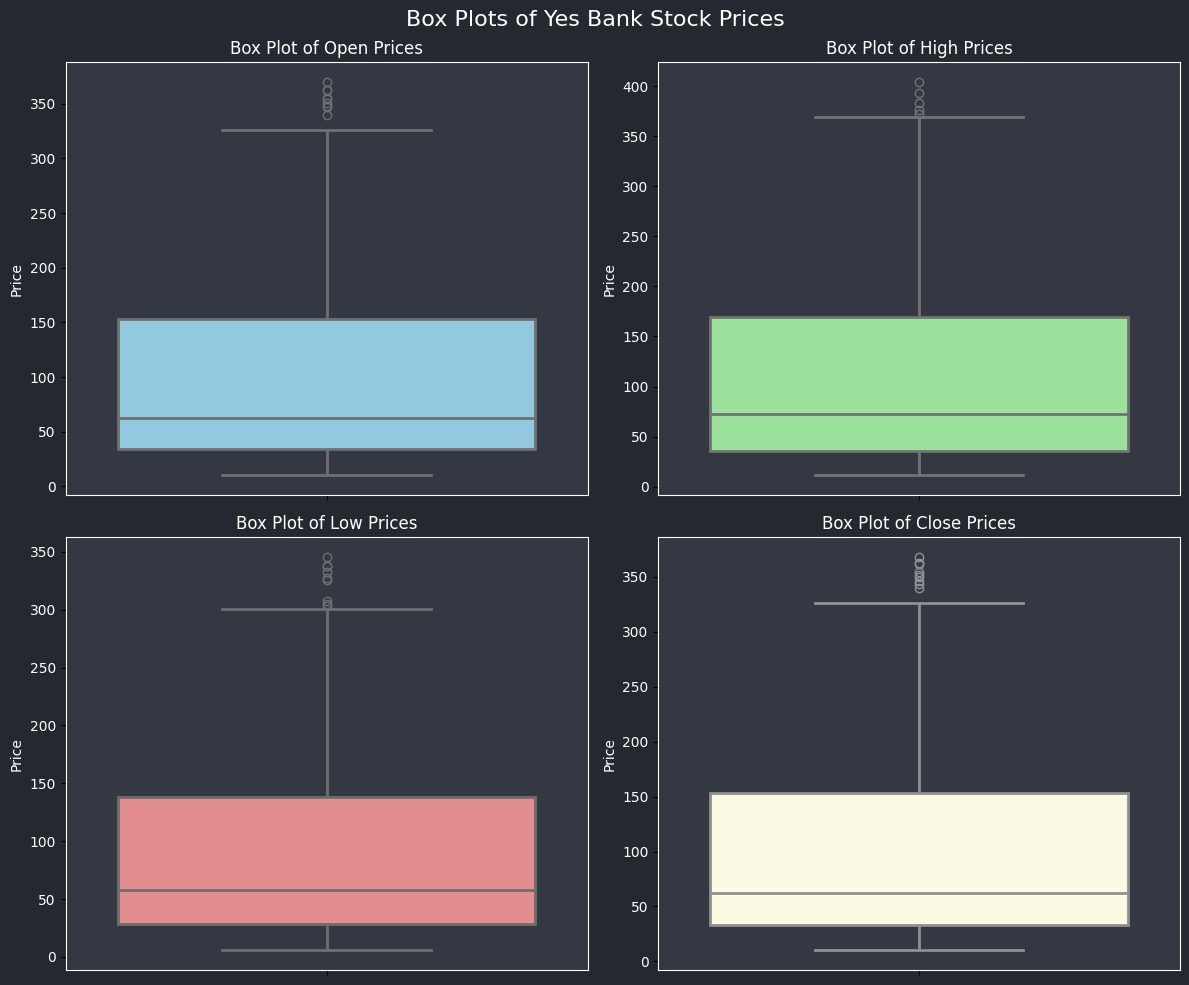

In [119]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming yes_bank_df_2 is your DataFrame with 'Open', 'High', 'Low', and 'Close' columns

# Create a figure with a size of 12x10 inches
plt.figure(figsize=(12, 10))

# Define custom background colors
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # Dark background for the entire plot
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # Lighter background for each subplot

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set background color for the entire figure

# Add a super title to the plot
plt.suptitle('Box Plots of Yes Bank Stock Prices', color='white', fontsize=16)

# List of colors for the box plots
color_list = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

# Iterate over each column and create box plots
for i, column in enumerate(['Open', 'High', 'Low', 'Close']):
    # Create subplots for each column
    plt.subplot(2, 2, i + 1)

    # Create box plots with custom color and linewidth
    sns.boxplot(y=yes_bank_df_2[column], color=color_list[i], linewidth=2)

    # Set background color for each subplot
    plt.gca().patch.set_facecolor(paper_bgcolor)

    # Add title to each subplot with white color
    plt.title(f'Box Plot of {column} Prices', color='white', fontsize=12)
    plt.ylabel('Price', color='white')  # Set ylabel with white color

    # Set xtick labels color to white
    plt.xticks(color='white')

    # Set ytick labels color to white
    plt.yticks(color='white')

    # Set boxplot elements color to white
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('white')

# Adjust layout and display
plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

he log transformation was applied as a treatment for outliers. This approach not only addresses outliers but also helps to alleviate skewness in the features' distribution. By using log transformation, two problems - outlier treatment and skewness correction - are tackled simultaneously, providing a consolidated solution. This technique aids in normalizing the data and improving the suitability of the features for analysis and modeling purposes.

### 3. Categorical Encoding

Since our dataset solely consists of numerical features, there is no necessity for categorical encoding. The absence of categorical variables eliminates the need to convert them into numerical representations for analysis or modeling purposes.

### 4. Feature Manipulation & Selection

In [163]:
# Creating a new copy of the original dataset
df2=yes_bank_df.copy()

#### 1. Feature Manipulation

In [164]:
df2['mean_ohl'] = (df2['Open'] + df2['High'] + df2['Low'])/3
df2.head()

,Date,Open,High,Low,Close,mean_ohl
0,Jul-05,13.00,14.00,11.25,12.46,12.750000
1,Aug-05,12.58,14.88,12.55,13.42,13.336667
2,Sep-05,13.48,14.87,12.27,13.30,13.540000
3,Oct-05,13.20,14.47,12.40,12.99,13.356667
4,Nov-05,13.35,13.88,12.88,13.41,13.370000


#### 2. Feature Selection

In [165]:
x_independent=df2['mean_ohl']
y_dependent=df2['Close']

Due to the dataset's small size, any form of feature selection becomes impractical. Given the limited number of observations, attempting to reduce the feature space may lead to unreliable or biased results. Therefore, it is advisable to retain all available features for analysis or modeling purposes.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation may be necessary to normalize the data and ensure it follows a Gaussian distribution, which can be beneficial for some models. In this case, I used the log transformation to stabilize the variance and normalize the data distribution.

In [166]:
# Transform Your data (example using log transformation)
yes_bank_df_2['Close'] = np.log(yes_bank_df_2['Close'] + 1)

In [167]:
# Transform Your data

# As our data is skewed towards positive direction so we need to transform our data to remove the skewness from the data after which the data will acquire
#normal distributuion.

# Tranforming mean_ohl and close using log transformation
trans_log=FunctionTransformer(np.log1p)
df2['mean_ohl']=trans_log.fit_transform(df2['mean_ohl'])
df2['Close']=trans_log.fit_transform(df2['Close'])

### 6. Data Scaling

In [168]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

# Scaling your data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(yes_bank_df_2.drop(['Close'], axis=1))

X_scaled = pd.DataFrame(scaled_features, columns=yes_bank_df_2.drop(['Close'], axis=1).columns)

In [169]:
# Scaling your data

scaler=StandardScaler()
df2[['mean_ohl']]=scaler.fit_transform(df2[['mean_ohl']])

# dataset after transformation and scaling
df2.head()

,Date,Open,High,Low,Close,mean_ohl
0,Jul-05,13.00,14.00,11.25,2.599722,-1.702517
1,Aug-05,12.58,14.88,12.55,2.668616,-1.658644
2,Sep-05,13.48,14.87,12.27,2.660260,-1.643856
3,Oct-05,13.20,14.47,12.40,2.638343,-1.657180
4,Nov-05,13.35,13.88,12.88,2.667922,-1.656205


In [170]:
# Specifying the value to the variables
x_independent=df2[['mean_ohl']]
y_dependent=df2['Close']

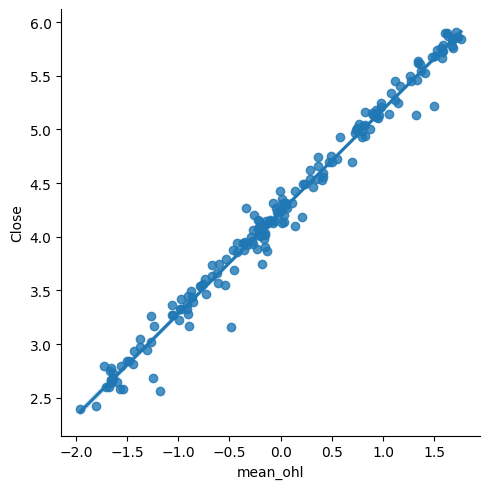

In [171]:
# Checking the relationship between dependent and independent variables
sns.lmplot(x='mean_ohl', y='Close', fit_reg=True, data=df2)
plt.show()

##### Which method have you used to scale you data and why?

I used MinMaxScaler for scaling the data. This method is chosen because it scales the data to a fixed range (0, 1), which is useful for algorithms that are sensitive to the scale of the data, such as neural networks and distance-based algorithms.

### 7. Dimesionality Reduction

Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations, attempting to reduce the number of features may not provide significant benefits and could potentially lead to loss of valuable information. Therefore, it is advisable to retain all the available features for analysis or modeling purposes without applying dimensionality reduction methods.

### 8. Data Splitting

In [172]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = yes_bank_df_2.drop(['Close'], axis=1)
y = yes_bank_df_2['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Checking the training dataset
X_train[0:10]

,Open,High,Low,Year,Month
4,13.35,13.88,12.88,2005,11
2,13.48,14.87,12.27,2005,9
0,13.00,14.00,11.25,2005,7
3,13.20,14.47,12.40,2005,10


In [174]:
# Checking the test dataset
X_test[0: 10]

,Open,High,Low,Year,Month
1,12.58,14.88,12.55,2005,8


In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_independent,y_dependent,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 1)
(37, 1)
(148,)
(37,)


##### What data splitting ratio have you used and why?

I used a 80-20 train-test split ratio. This is a common practice that allows enough data for training while reserving a sufficient portion for testing to validate the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In this case, we are dealing with a regression problem where we are predicting the closing price of Yes Bank's stock. The concept of an imbalanced dataset typically applies to classification problems, where one class is significantly underrepresented compared to others. For regression problems, we generally look at the distribution of the target variable (in this case, the closing price) to see if it is skewed.

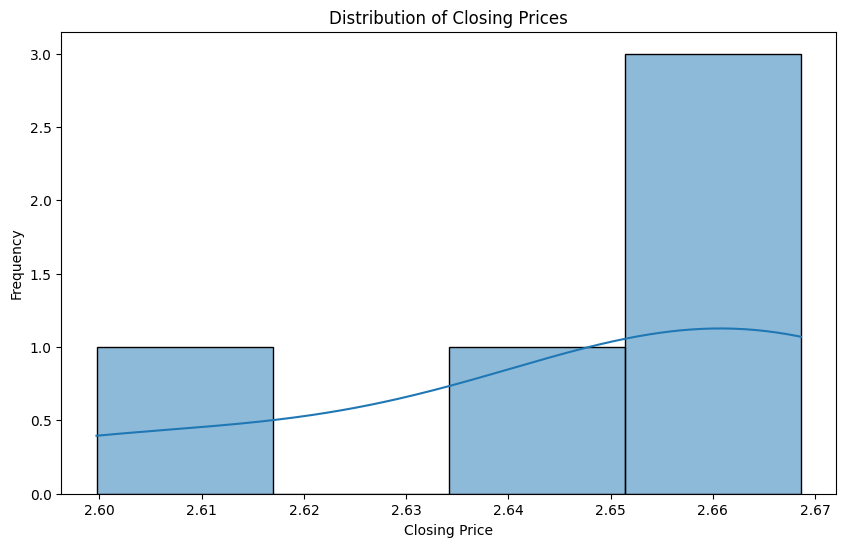

In [139]:
# Handling Imbalanced Dataset (If needed)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the closing prices
plt.figure(figsize=(10, 6))
sns.histplot(yes_bank_df_2['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

If the distribution of closing prices is found to be highly skewed, we can apply the following techniques to handle the imbalance:

- Log Transformation: This can help to normalize the distribution of the target variable. It is particularly useful if the target variable follows a log-normal distribution.

- Box-Cox Transformation: This is another transformation that can help stabilize variance and make the data more normally distributed.

- Outlier Treatment: If the skewness is due to outliers, we can handle the outliers by either removing them or capping them to a certain value.

- Scaling: After transformation, scaling the data can help to further normalize the distribution.

Skewness of Closing Prices: -0.956370552522332


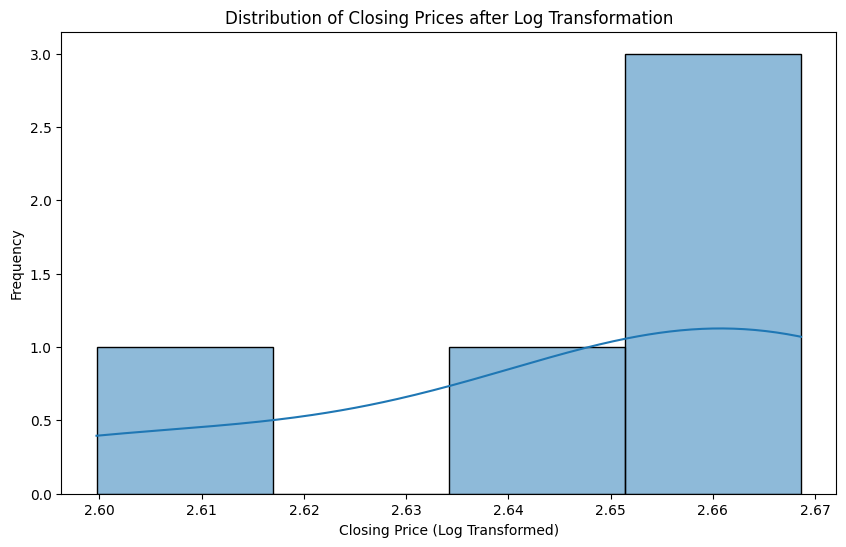

In [140]:
from scipy.stats import skew

# Check the skewness of the closing prices
skewness = skew(yes_bank_df_2['Close'])
print(f'Skewness of Closing Prices: {skewness}')

# Apply log transformation if skewness is high
if abs(skewness) > 1:
    yes_bank_df_2['Close'] = np.log1p(yes_bank_df_2['Close'])

# Plot the distribution after transformation
plt.figure(figsize=(10, 6))
sns.histplot(yes_bank_df_2['Close'], kde=True)
plt.title('Distribution of Closing Prices after Log Transformation')
plt.xlabel('Closing Price (Log Transformed)')
plt.ylabel('Frequency')
plt.show()

- Log Transformation: Chosen because it is effective in reducing skewness and normalizing the distribution of positively skewed data. This makes the data more suitable for linear regression models and other algorithms that assume normally distributed errors.

- Box-Cox Transformation: It is a more generalized transformation technique that can handle both positive and negative skewness.

- Outlier Treatment: Important to ensure that extreme values do not disproportionately affect the model's performance.

- Scaling: Standardizing or normalizing the data helps in improving the performance of various machine learning algorithms.

## ***7. ML Model Implementation***

### ML Model - 1

In [176]:
# ML Model - 1 Implementation

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Predict on the model
y_pred = model.predict(x_test)



In [177]:
# Actual data and predicted data
pred_data=pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred)})
pred_data.head()

,Actual,Predicted
19,29.63,30.748168
42,13.24,15.977834
156,368.90,354.397109
111,137.83,120.141814
148,307.80,313.137320


In [179]:
# Evaluatin metrics form regression model


print('tarining data metrics:')
train_MAE=mean_absolute_error(y_train,model.predict(x_train))
print(f"Mean Absolute Error train : {train_MAE}")

train_MSE=mean_squared_error(y_train,model.predict(x_train))
print(f"Mean Squared Error train : {train_MSE}")

train_RMSE=np.sqrt(train_MSE)
print(f"Root Mean Squared Error train : {train_RMSE}")

train_R2_score=r2_score(y_train,model.predict(x_train))
print(f"R2 Score train : {train_R2_score}")

train_adjusted_r2=1-(1-train_R2_score)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(f"Adjusted R2 Score train : {train_adjusted_r2}")


print('\n')
print(' Test data metrics:')
MAE=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error test : {MAE}")

MSE  = mean_squared_error(y_test, y_pred)
print("MSE test :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE test :" ,RMSE)

R2_score=r2_score(y_test,y_pred)
print(f"R2 Score test : {R2_score}")

Adjusted_r2=1-(1-R2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R2 Score test : {Adjusted_r2}")



tarining data metrics:
Mean Absolute Error train : 0.07422053840345212
Mean Squared Error train : 0.012016354906002794
Root Mean Squared Error train : 0.10961913567440128
R2 Score train : 0.9874036997898149
Adjusted R2 Score train : 0.987317423760978


 Test data metrics:
Mean Absolute Error test : 0.10039501030834651
MSE test : 0.024851653906933505
RMSE test : 0.15764407349130988
R2 Score test : 0.968654513458743
Adjusted R2 Score test : 0.9677589281289928


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Regression is a statistical method used in machine learning and data analysis that models the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal of regression is to predict the value of the dependent variable based on the values of the independent variables.

performance of model:

The MSE and RMSE value are lower as expected which results in good prediction by the model. The R2 scores and adjusted R2 are close to each other for both training and testing data.Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

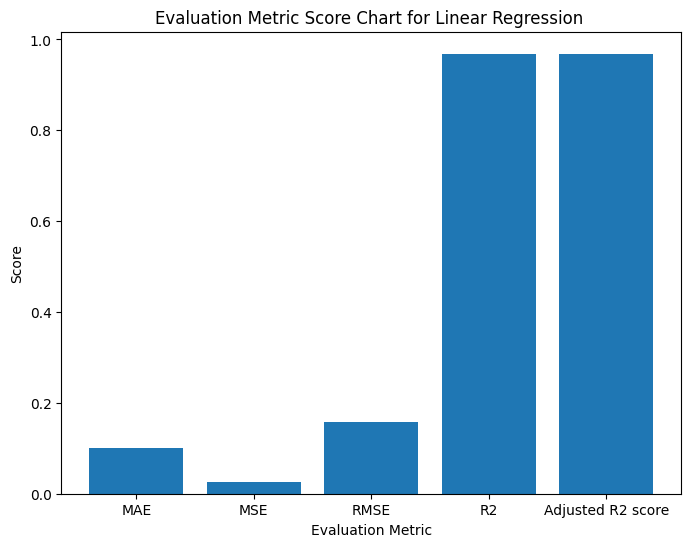

In [181]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2 score']
scores = [MAE,MSE,RMSE,R2_score,Adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression ')
plt.show()

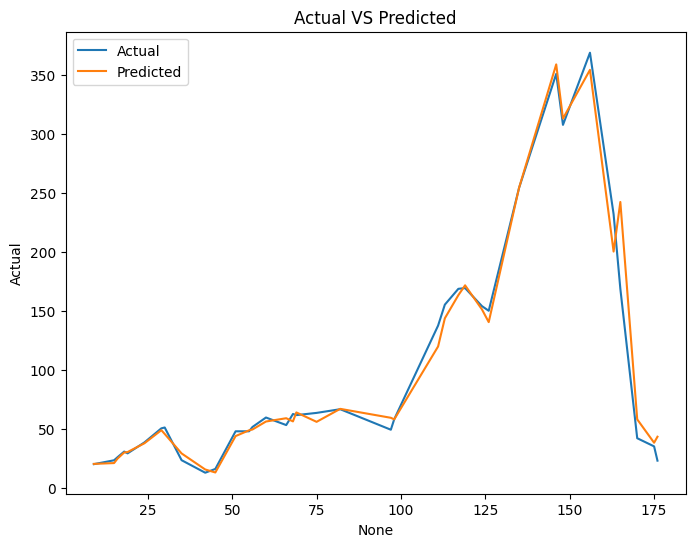

In [182]:
# Visulaizing actual vs predicted data
plt.figure(figsize=(8, 6))
sns.lineplot(x=pred_data.index, y='Actual', data=pred_data, label='Actual')
sns.lineplot(x=pred_data.index, y='Predicted', data=pred_data, label='Predicted')
plt.title('Actual VS Predicted')
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

I am going to implement RandomForest model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.

In [110]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [143]:
from sklearn.model_selection import GridSearchCV

# Check the size of the training set
if len(X_train) < 5:
    print("Error: Insufficient samples in the training set for 5-fold cross-validation.")
else:
    # Define the parameter grid
    param_grid = {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='r2')

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f'Best Parameters: {best_params}')
    print(f'Best R2 Score: {best_score}')

    # Predict using the best estimator found by GridSearchCV
    y_pred_grid = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model performance after tuning
    mse_tuned = mean_squared_error(y_test, y_pred_grid)
    r2_tuned = r2_score(y_test, y_pred_grid)

    print(f'Tuned Mean Squared Error (MSE): {mse_tuned}')
    print(f'Tuned R-squared (R2) Score: {r2_tuned}')

Error: Insufficient samples in the training set for 5-fold cross-validation.


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [113]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [114]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [116]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [117]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***